<a href="https://colab.research.google.com/github/kkokay07/Learning-Machine-Learning/blob/main/Regression%20Model/Linear%20Models/03.Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression: Step-by-Step Guide

## Introduction
Polynomial regression extends linear regression by modeling nonlinear relationships using polynomial terms of features. It's particularly useful when the relationship between variables follows a curved pattern.

## Mathematical Foundation
Y = β₀ + β₁X + β₂X² + β₃X³ + ... + βₙXⁿ + ε
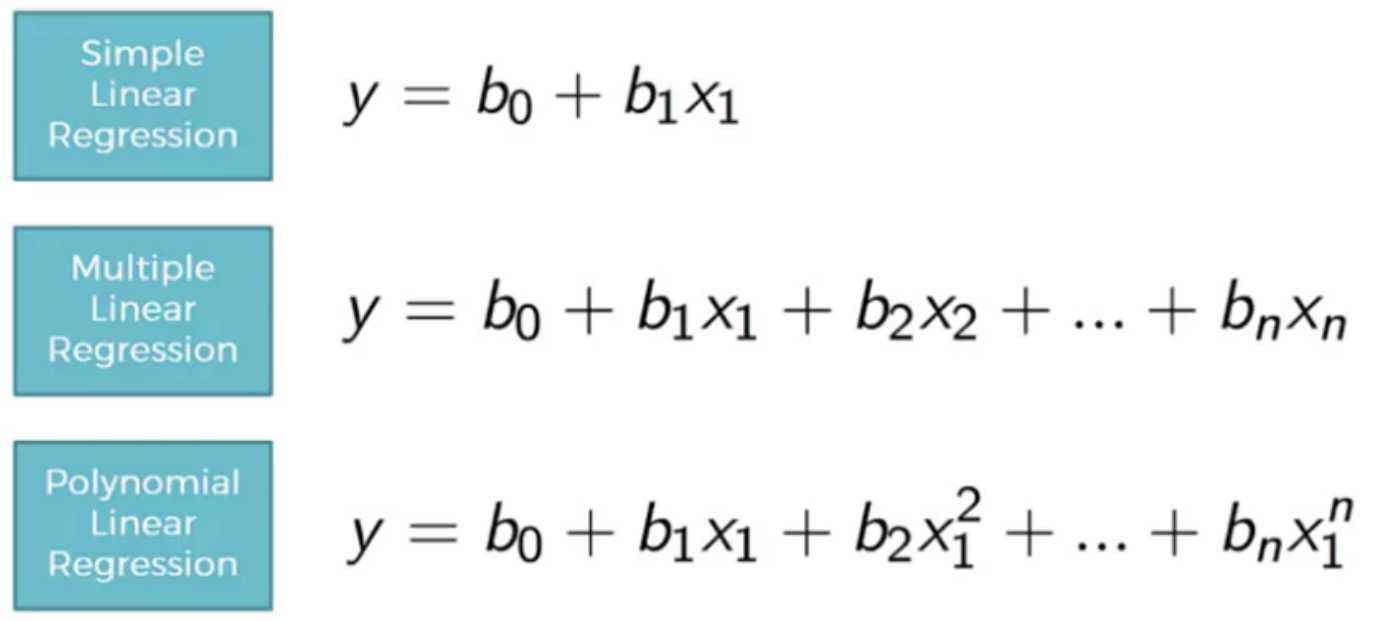

## Step-by-Step Implementation with Population Growth Example

In [2]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### Step 1: Data Preparation

In [3]:
# Generate sample population growth data
np.random.seed(42)
years = np.linspace(0, 10, 100)
population = 1000 + 150*years + 12*years**2 + np.random.normal(0, 100, 100)

X = years.reshape(-1, 1)
y = population

**Importance of Step 1:**
- Data preparation ensures clean, properly formatted input
- Synthetic data helps understand the underlying patterns
- Reshaping data (-1, 1) is crucial for sklearn compatibility
- Random seed ensures reproducibility

### Step 2: Visualize Raw Data

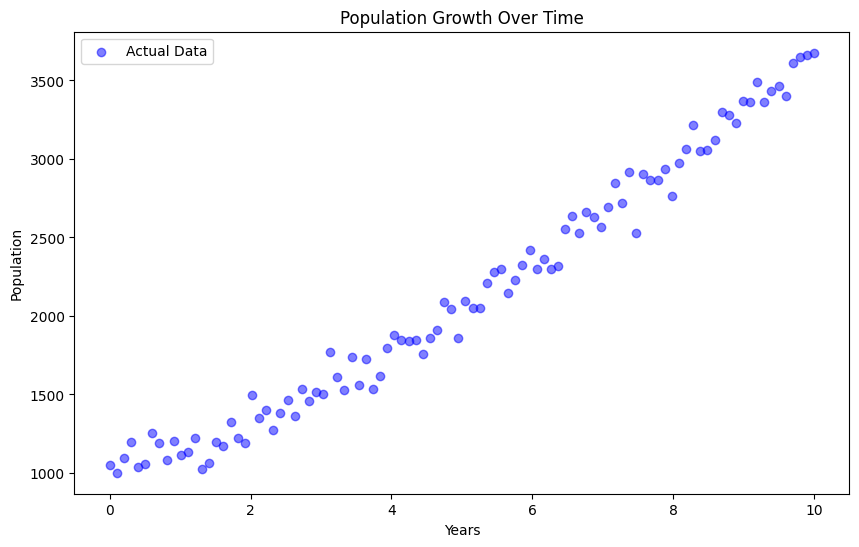

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population Growth Over Time')
plt.legend()
plt.show()

**Importance of Step 2:**
- Visual inspection helps identify patterns
- Helps determine appropriate polynomial degree
- Reveals potential outliers or anomalies
- Guides model selection decisions

### Step 3: Split the Data


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 80
Testing set size: 20


**Importance of Step 3:**
- Prevents overfitting by evaluating on unseen data
- Provides unbiased model evaluation
- Test size of 20% is a common baseline
- Random state ensures reproducible splits

### Step 4: Create Polynomial Features

In [6]:
# Try different degrees
degrees = [1, 2, 3, 4]
models = {}

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)

    # Transform features
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Print feature names
    feature_names = poly_features.get_feature_names_out(['X'])
    print(f"\nDegree {degree} features:", feature_names)

    # Store transformers and features
    models[degree] = {
        'transformer': poly_features,
        'X_train': X_train_poly,
        'X_test': X_test_poly
    }


Degree 1 features: ['X']

Degree 2 features: ['X' 'X^2']

Degree 3 features: ['X' 'X^2' 'X^3']

Degree 4 features: ['X' 'X^2' 'X^3' 'X^4']


**Importance of Step 4:**
- Creates higher-order terms for non-linear patterns
- Different degrees capture different complexity levels
- Feature names help interpret the model
- Separate transformation of train and test prevents data leakage

### Step 5: Train Models and Compare

In [7]:
for degree in degrees:
    # Get transformed features
    X_train_poly = models[degree]['X_train']
    X_test_poly = models[degree]['X_test']

    # Create and train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Store results
    models[degree]['model'] = model
    models[degree]['metrics'] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_rmse': test_rmse
    }

    print(f"\nDegree {degree} Results:")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Testing R²: {test_r2:.4f}")
    print(f"Testing RMSE: {test_rmse:.2f}")


Degree 1 Results:
Training R²: 0.9720
Testing R²: 0.9751
Testing RMSE: 120.16

Degree 2 Results:
Training R²: 0.9869
Testing R²: 0.9893
Testing RMSE: 78.72

Degree 3 Results:
Training R²: 0.9875
Testing R²: 0.9896
Testing RMSE: 77.60

Degree 4 Results:
Training R²: 0.9878
Testing R²: 0.9890
Testing RMSE: 79.68


**Importance of Step 5:**
- Trains models of different complexities
- Compares performance metrics
- Helps identify optimal polynomial degree
- Reveals potential overfitting

### Step 6: Visualize Model Comparisons

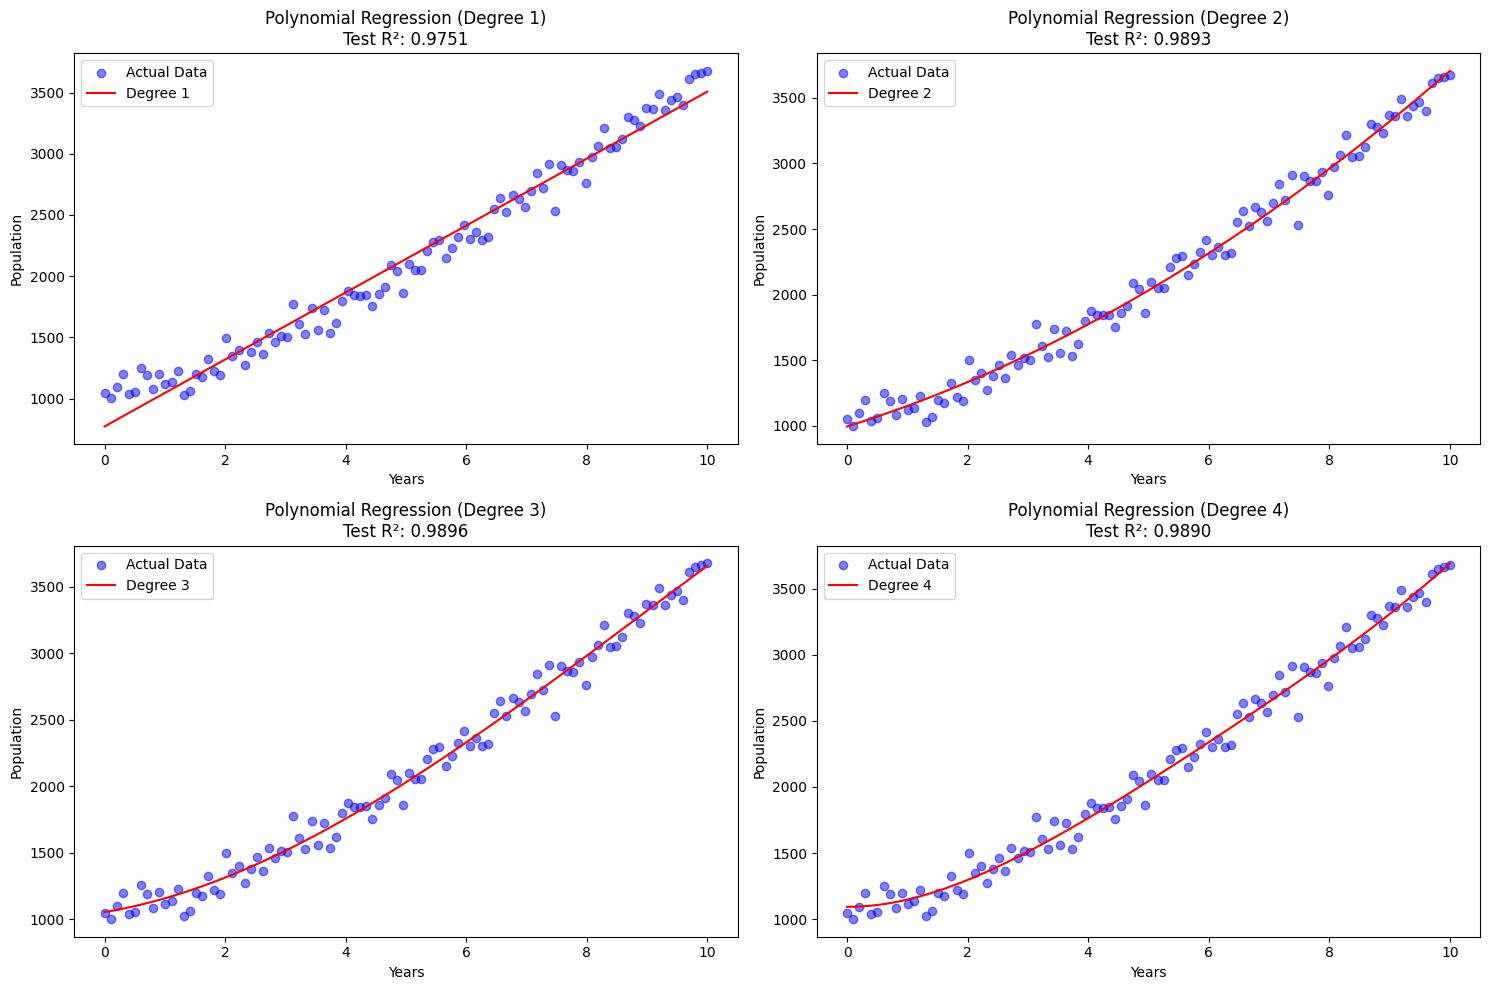

In [8]:
plt.figure(figsize=(15, 10))

# Create range for smooth curve
X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

for i, degree in enumerate(degrees, 1):
    plt.subplot(2, 2, i)

    # Get model and transformer
    model = models[degree]['model']
    transformer = models[degree]['transformer']

    # Transform smooth X and predict
    X_smooth_poly = transformer.transform(X_smooth)
    y_smooth = model.predict(X_smooth_poly)

    # Plot
    plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
    plt.plot(X_smooth, y_smooth, color='red', label=f'Degree {degree}')
    plt.xlabel('Years')
    plt.ylabel('Population')
    plt.title(f'Polynomial Regression (Degree {degree})\nTest R²: {models[degree]["metrics"]["test_r2"]:.4f}')
    plt.legend()

plt.tight_layout()
plt.show()

**Importance of Step 6:**
- Visual comparison of different models
- Shows potential overfitting in higher degrees
- Helps in selecting optimal model
- Validates numerical metrics visually

### Step 7: Residual Analysis

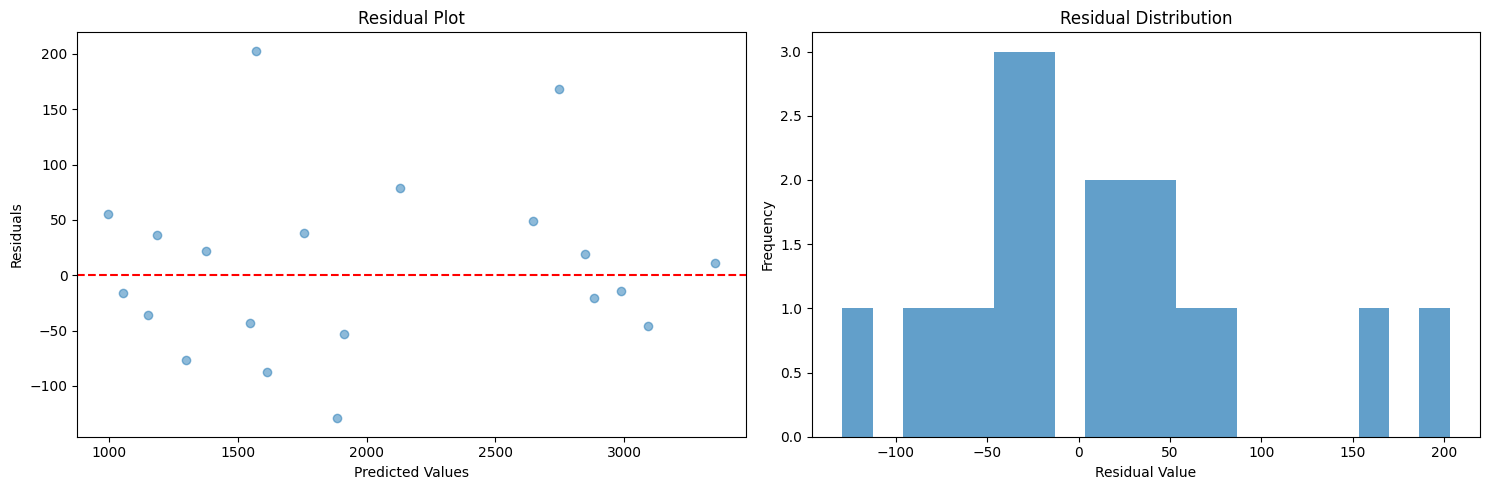

In [9]:
plt.figure(figsize=(15, 5))

# Choose best model (assume degree 2 for example)
best_degree = 2
best_model = models[best_degree]['model']
X_test_poly = models[best_degree]['X_test']
y_pred = best_model.predict(X_test_poly)
residuals = y_test - y_pred

# Residual plot
plt.subplot(121)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Residual distribution
plt.subplot(122)
plt.hist(residuals, bins=20, alpha=0.7)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()

**Importance of Step 7:**
- Validates model assumptions
- Identifies potential patterns in errors
- Checks for homoscedasticity
- Ensures residual normality

### Step 8: Feature Importance Analysis

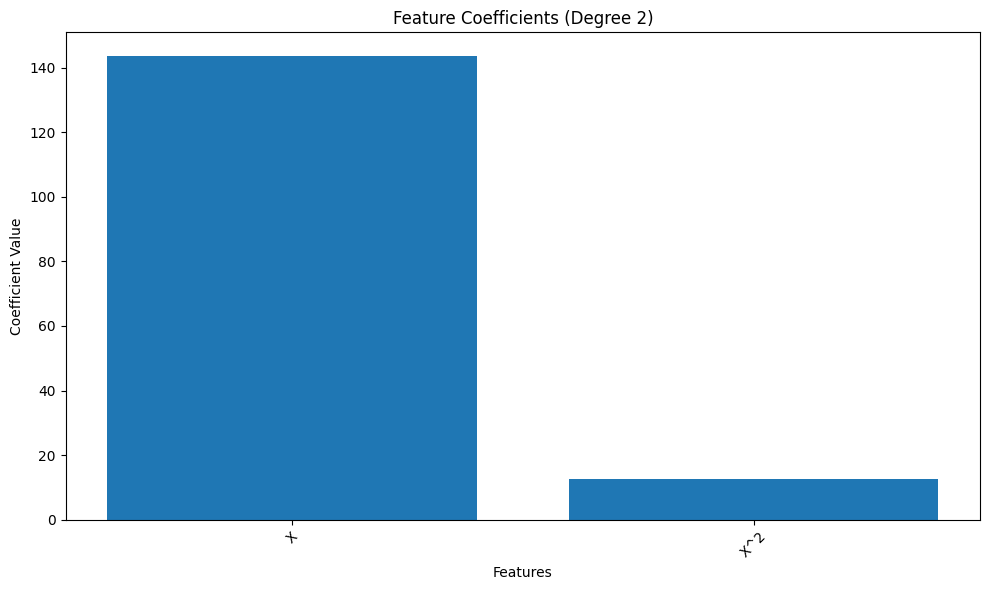

In [10]:
def plot_coefficients(degree):
    model = models[degree]['model']
    transformer = models[degree]['transformer']
    feature_names = transformer.get_feature_names_out(['X'])

    coefficients = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_
    })

    plt.figure(figsize=(10, 6))
    plt.bar(coefficients['Feature'], coefficients['Coefficient'])
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Coefficient Value')
    plt.title(f'Feature Coefficients (Degree {degree})')
    plt.tight_layout()
    plt.show()

plot_coefficients(2)  # Plot for degree 2

**Importance of Step 8:**
- Shows contribution of each polynomial term
- Helps interpret model behavior
- Identifies dominant terms
- Guides feature selection

### Step 9: Model Validation

In [11]:
from sklearn.model_selection import cross_val_score

# Choose best degree model
best_degree = 2
X_poly = models[best_degree]['transformer'].fit_transform(X)

# Perform cross-validation
cv_scores = cross_val_score(LinearRegression(), X_poly, y, cv=5)

print("\nCross-Validation Results:")
print(f"Mean R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Cross-Validation Results:
Mean R²: 0.4944 (+/- 0.9527)


**Importance of Step 9:**
- Validates model stability
- Provides robust performance estimates
- Helps detect overfitting
- Ensures model generalization

### Step 10: Prediction on New Data

In [12]:
def make_prediction(years_new, degree=2):
    # Reshape input
    X_new = np.array(years_new).reshape(-1, 1)

    # Transform features
    transformer = models[degree]['transformer']
    X_new_poly = transformer.transform(X_new)

    # Make prediction
    model = models[degree]['model']
    predictions = model.predict(X_new_poly)

    return predictions

# Example prediction
future_years = [11, 12, 13]
predictions = make_prediction(future_years)
print("\nPredictions for future years:", predictions)


Predictions for future years: [4116.59136674 4553.1854713  5015.24480899]


**Importance of Step 10:**
- Demonstrates practical model usage
- Provides prediction interface
- Enables model deployment
- Facilitates business decision-making

## Common Issues and Solutions

1. **Overfitting**
   - Solution: Use regularization
   - Monitor train vs test performance
   - Choose appropriate polynomial degree
   - Use cross-validation

2. **Feature Scaling**
   - Important for higher degrees
   - Prevents numerical instability
   - Improves optimization
   - Standardize or normalize features

3. **Degree Selection**
   - Use cross-validation
   - Consider business context
   - Balance complexity vs performance
   - Monitor for overfitting

4. **Extrapolation**
   - Be cautious with predictions outside data range
   - Consider confidence intervals
   - Validate with domain knowledge
   - Monitor prediction uncertainty